Columns in DataFrame: ['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age', 'Product Category', 'Quantity', 'Price per Unit', 'Total Amount']
Cleaned dataset:
   Transaction ID  Gender  Age Product Category  Quantity  Price per Unit  \
0               1    Male   34           Beauty         3              50   
1               2  Female   26         Clothing         2             500   
2               3    Male   50      Electronics         1              30   
3               4    Male   37         Clothing         1             500   
4               5    Male   30           Beauty         2              50   

   Total Amount  Year  Month  Day  
0           150  2023     11   24  
1          1000  2023      2   27  
2            30  2023      1   13  
3           500  2023      5   21  
4           100  2023      5    6  


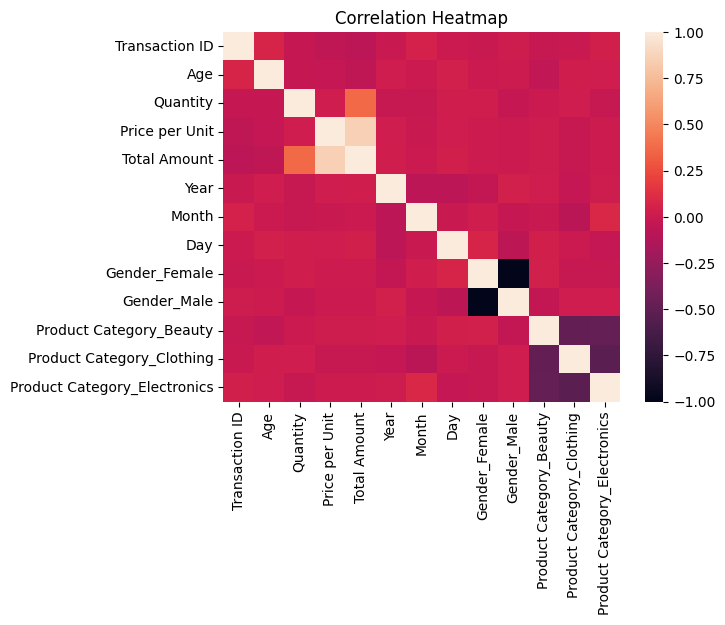

Index(['Transaction ID', 'Age', 'Quantity', 'Price per Unit', 'Total Amount',
       'Year', 'Month', 'Day', 'Gender_Female', 'Gender_Male',
       'Product Category_Beauty', 'Product Category_Clothing',
       'Product Category_Electronics'],
      dtype='object')


In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import numpy as np

# Reload the Excel file
df = pd.read_csv("C:\\Users\\joshy\\Desktop\\sales.csv")

# Print all column names
print("Columns in DataFrame:", df.columns.tolist())

# Load your dataset
df = pd.read_csv("C:\\Users\\joshy\\Desktop\\sales.csv")

# Convert the 'Date' column to datetime format
if 'Date' in df.columns:  # Ensure the column exists
    df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

# Extract year, month, and day from the 'Date' column 
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Adjust these column names as per your dataset
columns_to_drop = ['Date', 'Customer ID']  # Replace with columns you want to exclude
df = df.drop(columns=columns_to_drop)
print("Cleaned dataset:")
print(df.head())

df = pd.get_dummies(df, columns=['Gender'])
df = pd.get_dummies(df, columns=['Product Category'])


# Visualize correlations with a heatmap
sns.heatmap(df.corr())
plt.title("Correlation Heatmap")
plt.show()
print(df.columns)


In [33]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

# Split the data
X = df[['Age', 'Quantity', 'Price per Unit','Gender_Female', 'Gender_Male']]
y = df['Product Category_Electronics']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train Naive Bayes on the resampled data
mnb = MultinomialNB()
mnb.fit(X_resampled, y_resampled)

# Evaluate the model
accuracy = mnb.score(X_test, y_test)
print("Accuracy:", accuracy)
print(classification_report(y_test, mnb.predict(X_test), zero_division=1))



Accuracy: 0.545
              precision    recall  f1-score   support

       False       0.68      0.59      0.63       133
        True       0.36      0.45      0.40        67

    accuracy                           0.55       200
   macro avg       0.52      0.52      0.52       200
weighted avg       0.57      0.55      0.56       200



C:\Users\joshy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Users\joshy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


              precision    recall  f1-score   support

       False       0.68      0.59      0.63       133
        True       0.36      0.45      0.40        67

    accuracy                           0.55       200
   macro avg       0.52      0.52      0.52       200
weighted avg       0.57      0.55      0.56       200

